In [13]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90
from collections import OrderedDict, defaultdict
from operator import itemgetter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import plotly.offline as py
import plotly.graph_objs as go
from IPython.display import Image
import plotly.io as pio


In [2]:
#Lendo as planilhas de dados
estabelecimentos = 'A094141189.csv'
est = pd.read_csv(estabelecimentos,encoding='ISO-8859-1',delimiter=';')
funcionarios = 'A094300189.csv'
fun = pd.read_csv(funcionarios, encoding='ISO-8859-1',delimiter=';')

estjan = pd.read_csv('A105634189-jan-20.csv',encoding='ISO-8859-1',delimiter=';')
estmai = pd.read_csv('A105655189-mai-19.csv',encoding='ISO-8859-1',delimiter=';')
funjan = pd.read_csv('A100005189-jan-20.csv',encoding='ISO-8859-1',delimiter=';')
funmai = pd.read_csv('A105849189-mai-19.csv',encoding='ISO-8859-1',delimiter=';')


In [3]:
#Separando os dados em um dicionário e ordenando-os pela quantidade
dicest={}
for x in range(est.index.size):
    dicest[est.loc[x,'MUNICIPIO']]=est.loc[x,'QUANTIDADE']
    
dicest = sorted(dicest.items(), key=itemgetter(1),reverse=True)

dicestjan={}
for x in range(estjan.index.size):
    dicestjan[estjan.loc[x,'MUNICIPIO']]=estjan.loc[x,'QUANTIDADE']
    
dicestjan = sorted(dicestjan.items(), key=itemgetter(1),reverse=True)

dicestmai={}
for x in range(estmai.index.size):
    dicestmai[estmai.loc[x,'MUNICIPIO']]=estmai.loc[x,'QUANTIDADE']
    
dicestmai = sorted(dicestmai.items(), key=itemgetter(1),reverse=True)


dicfun={}
for x in range(fun.index.size):
    dicfun[fun.loc[x,'MUNICIPIO']]=fun.loc[x,'QUANTIDADE']

dicfun = sorted(dicfun.items(), key=itemgetter(1),reverse=True)

dicfunjan={}
for x in range(funjan.index.size):
    dicfunjan[funjan.loc[x,'MUNICIPIO']]=funjan.loc[x,'QUANTIDADE']

dicfunjan = sorted(dicfunjan.items(), key=itemgetter(1),reverse=True)

dicfunmai={}
for x in range(funmai.index.size):
    dicfunmai[funmai.loc[x,'MUNICIPIO']]=funmai.loc[x,'QUANTIDADE']

dicfunmai = sorted(dicfunmai.items(), key=itemgetter(1),reverse=True)





In [4]:
#Criando as listas para fazer as plotagens

cidadeest=[]
quantidadeest=[]
for cidade,quantidade in dicest:
    cidadeest.append(cidade[7:])
    quantidadeest.append(quantidade)

cidadeestjan=[]
quantidadeestjan=[]
for cidade,quantidade in dicestjan:
    cidadeestjan.append(cidade[7:])
    quantidadeestjan.append(quantidade)
    
cidadeestmai=[]
quantidadeestmai=[]
for cidade,quantidade in dicestmai:
    cidadeestmai.append(cidade[7:])
    quantidadeestmai.append(quantidade)
    
    
cidadefun=[]
quantidadefun=[]
for cidade,quantidade in dicfun:
    cidadefun.append(cidade[7:])
    quantidadefun.append(quantidade)
    
cidadefunjan=[]
quantidadefunjan=[]
for cidade,quantidade in dicfunjan:
    cidadefunjan.append(cidade[7:])
    quantidadefunjan.append(quantidade)

cidadefunmai=[]
quantidadefunmai=[]
for cidade,quantidade in dicfunmai:
    cidadefunmai.append(cidade[7:])
    quantidadefunmai.append(quantidade)



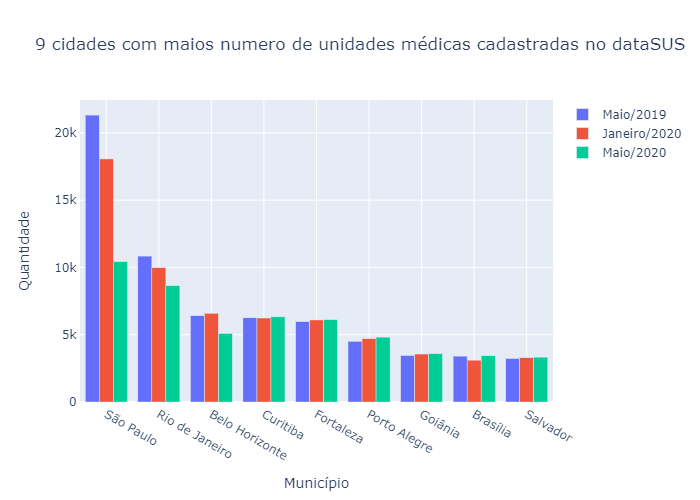

In [15]:
#Plotagem do gráfico das 9 cidades com mais unidades médicas ativas cadastradas no dataSUS
x1=go.Bar(x=cidadeestmai[1:10],y=quantidadeestmai[1:10],name="Maio/2019")
x2=go.Bar(x=cidadeest[1:10],y=quantidadeest[1:10],name='Maio/2020')
x3=go.Bar(x=cidadeestjan[1:10],y=quantidadeestjan[1:10],name='Janeiro/2020')
data=[x1,x3,x2]
layout = go.Layout(title='9 cidades com maios numero de unidades médicas cadastradas no dataSUS',
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Município'})

fig=go.Figure(data=data,layout=layout)
#py.plot(fig)

Image(pio.to_image(fig, format='png'))


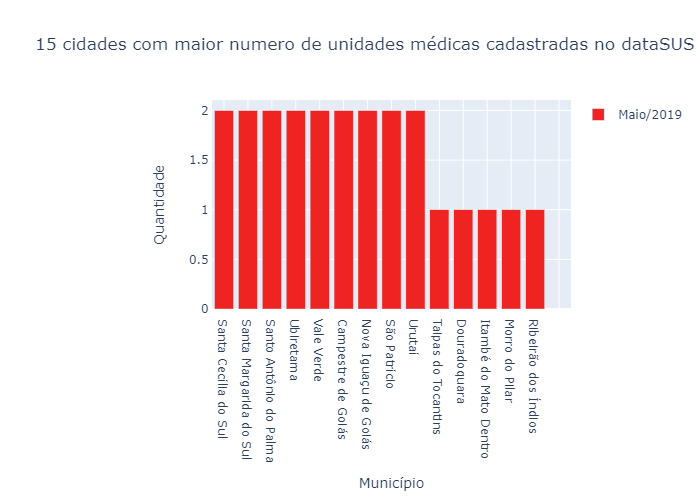

In [62]:
#Plotagens das 15 cidades com menas unidades médicas cadastradas no dataSUS em 3 datas distintas
x1=go.Bar(x=cidadeestmai[-15:],y=quantidadeestmai[-15:],name="Maio/2019",marker={'color' : '#ee2322'})
x2=go.Bar(x=cidadeest[-15:],y=quantidadeest[-15:],name='Maio/2020',marker = {'color': '#ee5253'})
x3=go.Bar(x=cidadeestjan[-15:],y=quantidadeestjan[-15:],name='Janeiro/2020',marker = {'color': '#ff9f43'})

layout = go.Layout(title='15 cidades com maior numero de unidades médicas cadastradas no dataSUS',
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Município'})


fig=go.Figure(data=x1,layout=layout)
fig.update_layout(showlegend=True)

fig2=go.Figure(data=x2,layout=layout)
fig2.update_layout(showlegend=True)

fig3=go.Figure(data=x3,layout=layout)
fig3.update_layout(showlegend=True)

Image(pio.to_image(fig, format='png'))

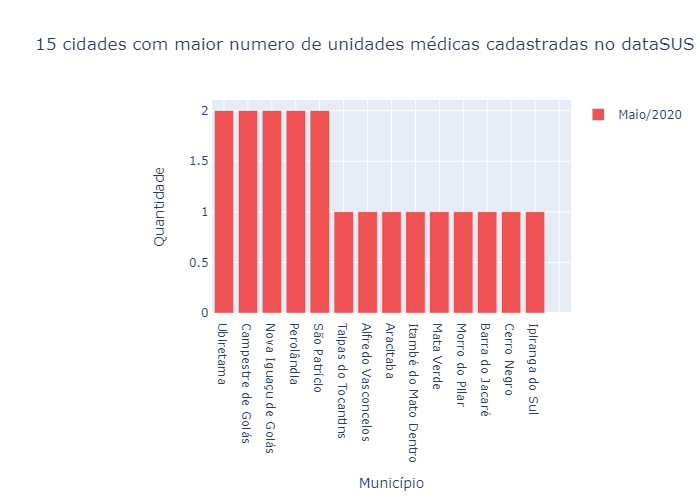

In [63]:
Image(pio.to_image(fig2, format='png'))

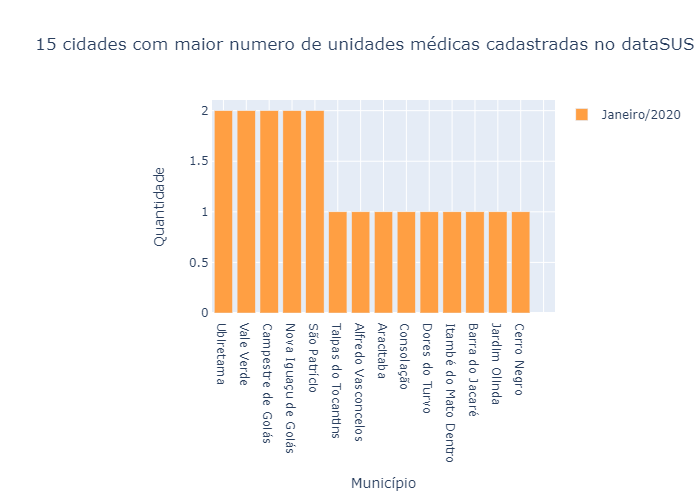

In [64]:
Image(pio.to_image(fig3, format='png'))

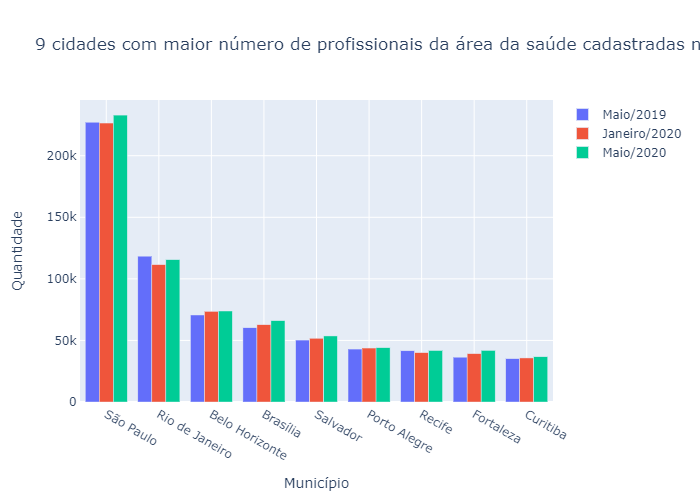

In [65]:
#Plotagem do gráfico com as 9 cidades que possuem o maior número de funcionarios da área da saúde cadastrados no dataSUS
x1=go.Bar(x=cidadefunmai[1:10],y=quantidadefunmai[1:10],name="Maio/2019")
x2=go.Bar(x=cidadefun[1:10],y=quantidadefun[1:10],name='Maio/2020')
x3=go.Bar(x=cidadefunjan[1:10],y=quantidadefunjan[1:10],name='Janeiro/2020')
data=[x1,x3,x2]
layout = go.Layout(title='9 cidades com maior número de profissionais da área da saúde cadastradas no dataSUS',
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Município'})

fig=go.Figure(data=data,layout=layout)
Image(pio.to_image(fig, format='png'))

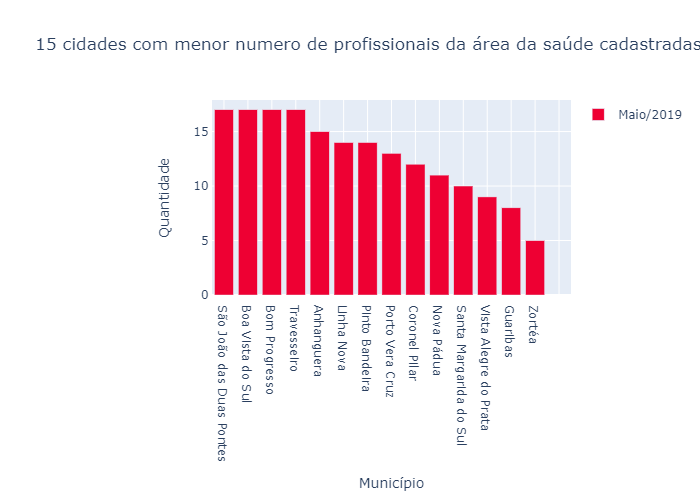

In [66]:
x1=go.Bar(x=cidadefunmai[-15:],y=quantidadefunmai[-15:],name="Maio/2019",marker = {'color': '#ee0033'})
x2=go.Bar(x=cidadefun[-15:],y=quantidadefun[-15:],name='Maio/2020',marker = {'color': '#ee5253'})
x3=go.Bar(x=cidadefunjan[-15:],y=quantidadefunjan[-15:],name='Janeiro/2020',marker = {'color': '#ff9f43'})

layout = go.Layout(title='15 cidades com menor numero de profissionais da área da saúde cadastradas no dataSUS',
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Município'})


fig4=go.Figure(data=x1,layout=layout)
fig4.update_layout(showlegend=True)

fig5=go.Figure(data=x2,layout=layout)
fig5.update_layout(showlegend=True)

fig6=go.Figure(data=x3,layout=layout)
fig6.update_layout(showlegend=True)

Image(pio.to_image(fig4, format='png'))

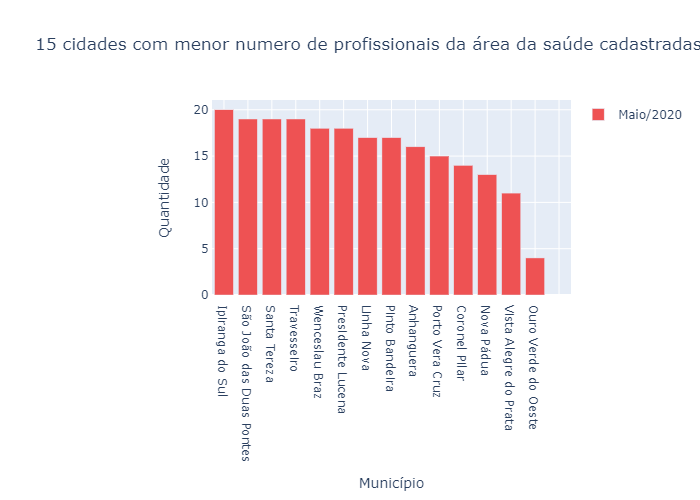

In [67]:
Image(pio.to_image(fig5, format='png'))

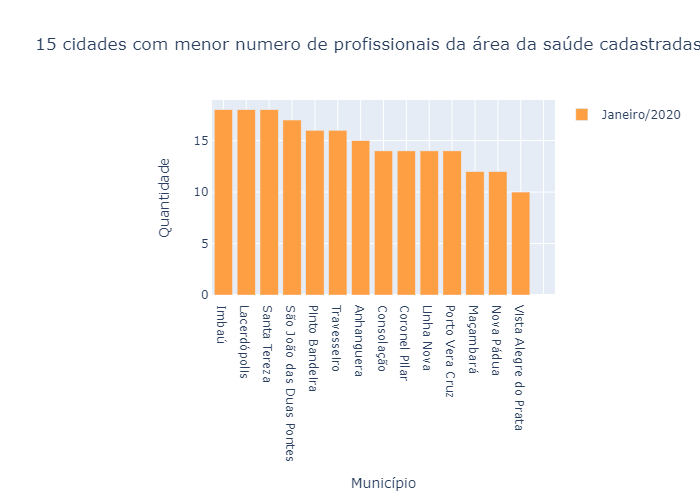

In [68]:
Image(pio.to_image(fig6, format='png'))